# Section 3 - Clustering

Import and standardization

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from IPython.display import display
from sklearn.utils import resample
from joblib import Parallel, delayed
import matplotlib.colors as mcolors
from sklearn.neighbors import NearestNeighbors

#load dataset
df = pd.read_csv('df_processed.csv',low_memory = False)
df_copy = df.copy()
df_copy = df_copy.drop(columns = 'label')
X = df_copy.to_numpy()
y = df[['label']].values


# K-Means


### Determinate the number of clusters

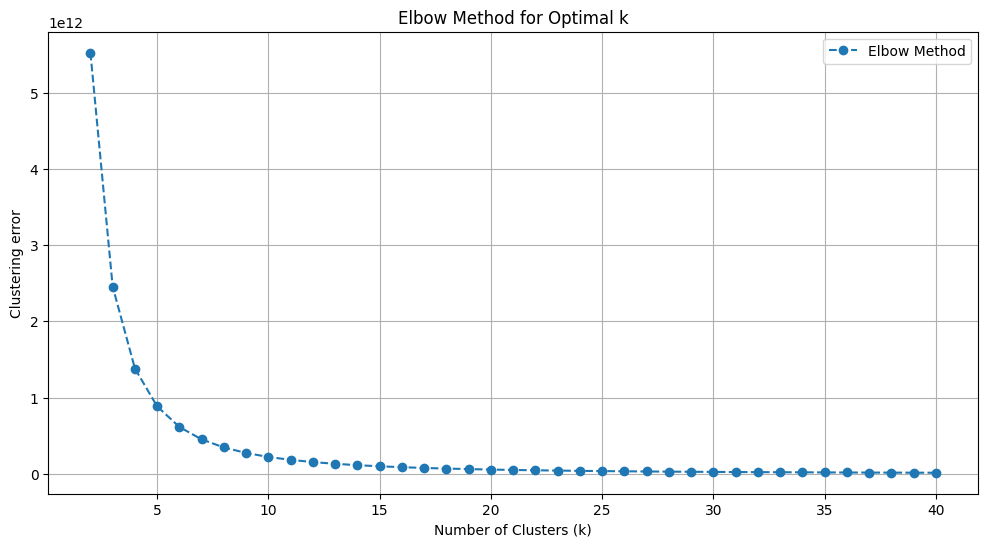

In [2]:
#Elbow method and silhouette analysis to determine the number of clusters
kmeans_results =  []
for k in range(2, 41):
    kmeans_results.append((KMeans(n_clusters=k).fit(X)).inertia_)

#Plot elbow
plt.figure(figsize=(12, 6))
plt.plot(range(2, 41), kmeans_results, marker='o', linestyle='--', label='Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Clustering error')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.grid()
plt.show()

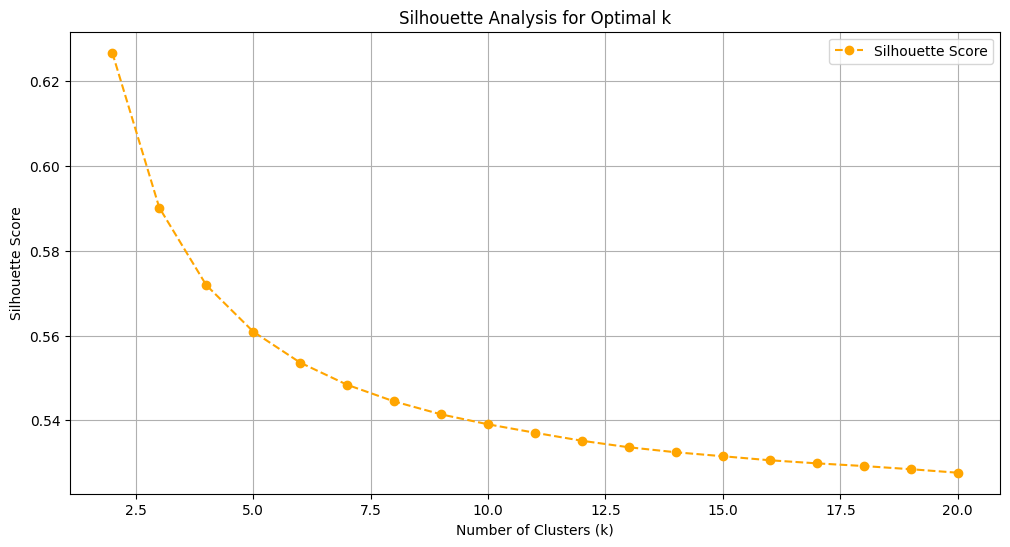

In [7]:
#Plot silhouette
silhouette_scores = []
for k in range(2, 21):
    silhouette_scores.append(silhouette_score(X, (KMeans(n_clusters=k).fit_predict(X))))
plt.figure(figsize=(12, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='--', color='orange', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.legend()
plt.grid()
plt.show()

### Performance Tuning

Find best hyper-parameters

In [3]:
optimal_cluster = 11
kmeans = KMeans(n_clusters=optimal_cluster, n_init=50, init='k-means++', random_state=42)
lab = kmeans.fit_predict(X)
# Unsupervised metric
silhouette  = silhouette_score(X, lab)
# Supervised metrics
ri = rand_score(np.ravel(y), lab)
ari = adjusted_rand_score(np.ravel(y), lab)

print('k-Means with 11 clusters')
(unique, counts)=np.unique( lab, return_counts=True)
print("Size of each cluster: ", counts)
print(f'k_means clustering error: {round(kmeans.inertia_, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')


k-Means with 11 clusters
Size of each cluster:  [5944 5790 5807 5853 5850 5856 5829 5817 5759 5908 5826]
k_means clustering error: 182615056532.76
Silhouette: 0.54
RI: 0.98
ARI: 0.87


In [9]:
print("Sum of squared distances of the samples from their centroid: ", kmeans.inertia_)
print("Mean squared distances of the samples from their centroid: ", kmeans.inertia_/len(df))

Sum of squared distances of the samples from their centroid:  182615056532.75937
Mean squared distances of the samples from their centroid:  2842744.3847625176


In [10]:
#Rand Index
rand_score_result = rand_score(df["label"], lab)
print("RI between clustering and given classes is ",rand_score_result)

#ARI
adj_rand_score_result = adjusted_rand_score(df["label"], lab)
print("ARI between clustering and given classes is ",adj_rand_score_result)

RI between clustering and given classes is  0.9793723070204375
ARI between clustering and given classes is  0.8737116101020375


Visualization

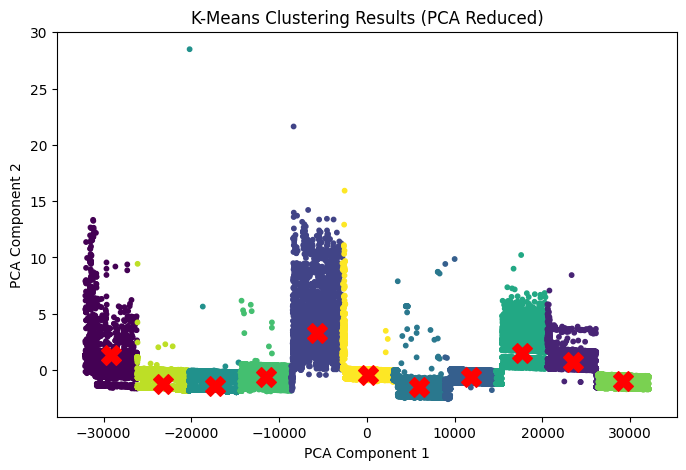

In [11]:


pca = PCA(n_components=2)
data_2d = pca.fit_transform(X)

centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot clusters
plt.figure(figsize=(8, 5))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=lab, cmap='viridis', s=10)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroidi')
plt.title('K-Means Clustering Results (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### Analysis of clusters

In [12]:


# Clustering K-Means on the original data
kmeans = KMeans(n_clusters=11, n_init=50, init='k-means++', random_state=42)
lab = kmeans.fit_predict(X)

# Number of points assigned to each cluster
unique, counts = np.unique(lab, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster Sizes:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} points")

# Cluster centroids on the original data
cluster_centers_original = kmeans.cluster_centers_  # Centroids are already in the original scale
print("Cluster Centers (Original Scale):")
print(cluster_centers_original)

# Calculation of the Silhouette Score
silhouette = silhouette_score(X, lab)
print(f"Average Silhouette Score: {silhouette:.2f}")



Cluster Sizes:
Cluster 0: 5944 points
Cluster 1: 5790 points
Cluster 2: 5807 points
Cluster 3: 5853 points
Cluster 4: 5850 points
Cluster 5: 5856 points
Cluster 6: 5829 points
Cluster 7: 5817 points
Cluster 8: 5759 points
Cluster 9: 5908 points
Cluster 10: 5826 points
Cluster Centers (Original Scale):
[[ 2.97700000e+03 -1.55990154e+00  2.47451467e-01 -1.42855889e-01
  -6.63136703e-03 -2.62661172e-02  7.70585623e-03 -5.69219616e-01
   1.09489554e-02  2.27979621e-02 -3.89129279e-02  3.94454482e-03
  -9.28735981e-01  5.95808809e-03 -1.10845746e-01  2.40162756e-02
   4.86810638e-02 -4.29477442e-01  1.43314784e-02 -1.52337846e-02
  -9.18640496e-01 -1.24336156e-01  2.28618035e-02  2.51744872e+00
  -4.72791677e-01 -1.18723546e-02 -1.17540601e-01 -1.50764826e-01
   2.01511335e-03  8.54743913e-02  9.12510495e-01  1.61209068e-01
   8.38790932e-01]
 [ 5.55950000e+04  1.27945708e+00 -3.47355918e-02 -1.02142491e+00
  -1.63279017e-01 -6.95963104e-02 -1.46260845e-01 -7.49935098e-01
  -1.54313896e-02 

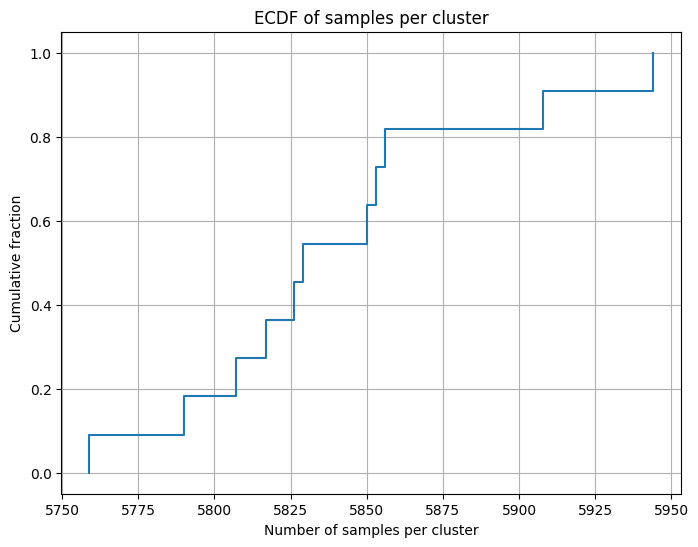

In [13]:
cluster_counts = np.bincount(kmeans.labels_)

#  ECDF
ecdf = ECDF(cluster_counts)

# Plot ECDF
plt.figure(figsize=(8, 6))
plt.step(ecdf.x, ecdf.y, where='post')
plt.xlabel("Number of samples per cluster")
plt.ylabel("Cumulative fraction")
plt.title("ECDF of samples per cluster")
plt.grid(True)
plt.show()


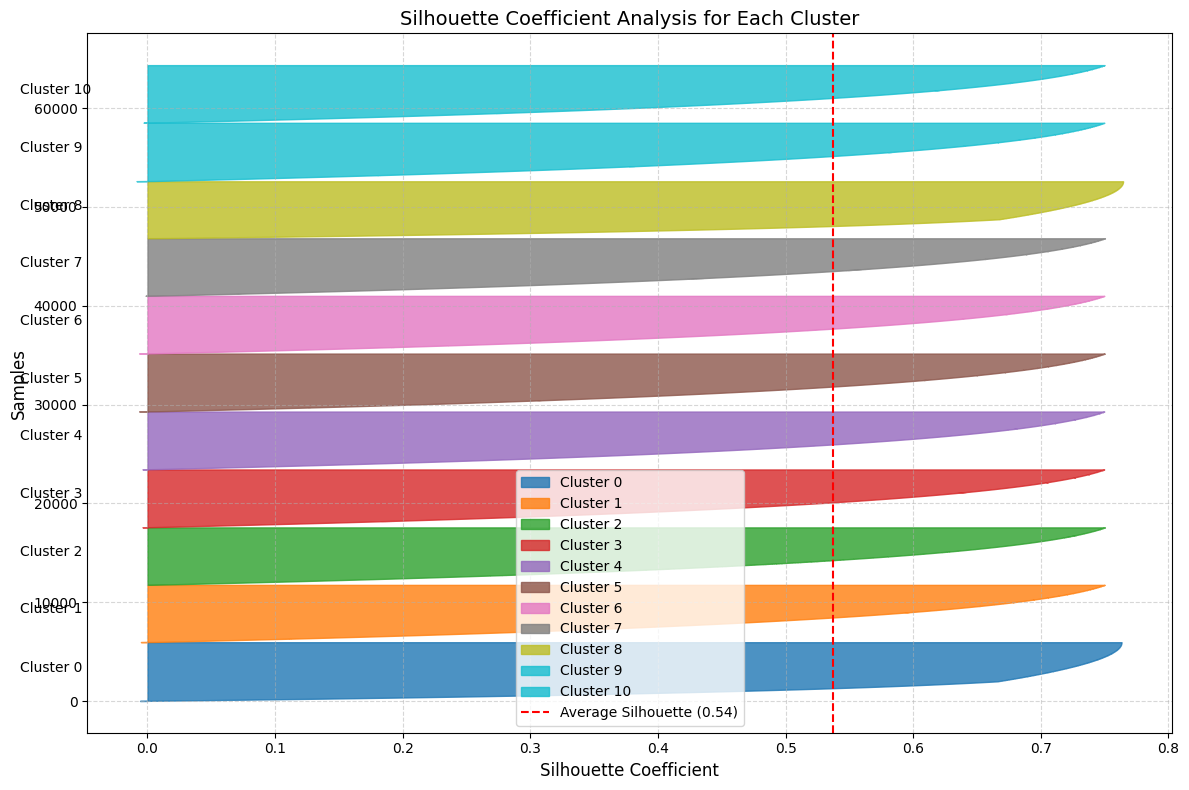

In [14]:
silhouette_vals = silhouette_samples(X, lab)  


# Plot silhouette scores
plt.figure(figsize=(12, 8))  
y_lower = 10
n_clusters = len(np.unique(kmeans.labels_))  
colors = cm.tab10(np.linspace(0, 1, n_clusters)) 

for i, color in zip(np.unique(kmeans.labels_), colors):
    ith_cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_vals,
        facecolor=color,
        edgecolor=color,
        alpha=0.8,
        label=f"Cluster {i}"
    )
    plt.text(-0.1, y_lower + 0.5 * size_cluster_i, f"Cluster {i}", fontsize=10, color='black')
    y_lower = y_upper + 10 

avg_silhouette = np.mean(silhouette_vals)
plt.axvline(x=avg_silhouette, color="red", linestyle="--", label=f"Average Silhouette ({avg_silhouette:.2f})")


plt.xlabel("Silhouette Coefficient", fontsize=12)
plt.ylabel("Samples", fontsize=12)
plt.title("Silhouette Coefficient Analysis for Each Cluster", fontsize=14)
plt.legend(loc="best", fontsize=10)
plt.grid(visible=True, linestyle="--", alpha=0.5)  
plt.tight_layout()

plt.show()

In [15]:
# Cross-tabulation between original labels and detected clusters
cross_tab = pd.crosstab(df['label'], kmeans.labels_, rownames=['Original Labels'], colnames=['Cluster'])
print("Contingency Table:")

display(cross_tab)

Contingency Table:


Cluster,0,1,2,3,4,5,6,7,8,9,10
Original Labels,,,,,,,,,,,
benign,615,0,4747,3,27,0,1,9,0,1,255
ddos_dns,5329,0,0,0,0,0,0,0,0,40,0
ddos_ldap,0,0,0,0,0,61,0,0,0,5867,0
ddos_mssql,0,0,0,0,0,5795,0,116,0,0,0
ddos_netbios,0,0,138,0,0,0,0,5692,0,0,0
ddos_ntp,0,0,922,0,0,0,0,0,0,0,64
ddos_snmp,0,0,0,0,477,0,0,0,0,0,5507
ddos_ssdp,0,0,0,624,5346,0,0,0,0,0,0
ddos_syn,0,302,0,0,0,0,5178,0,0,0,0


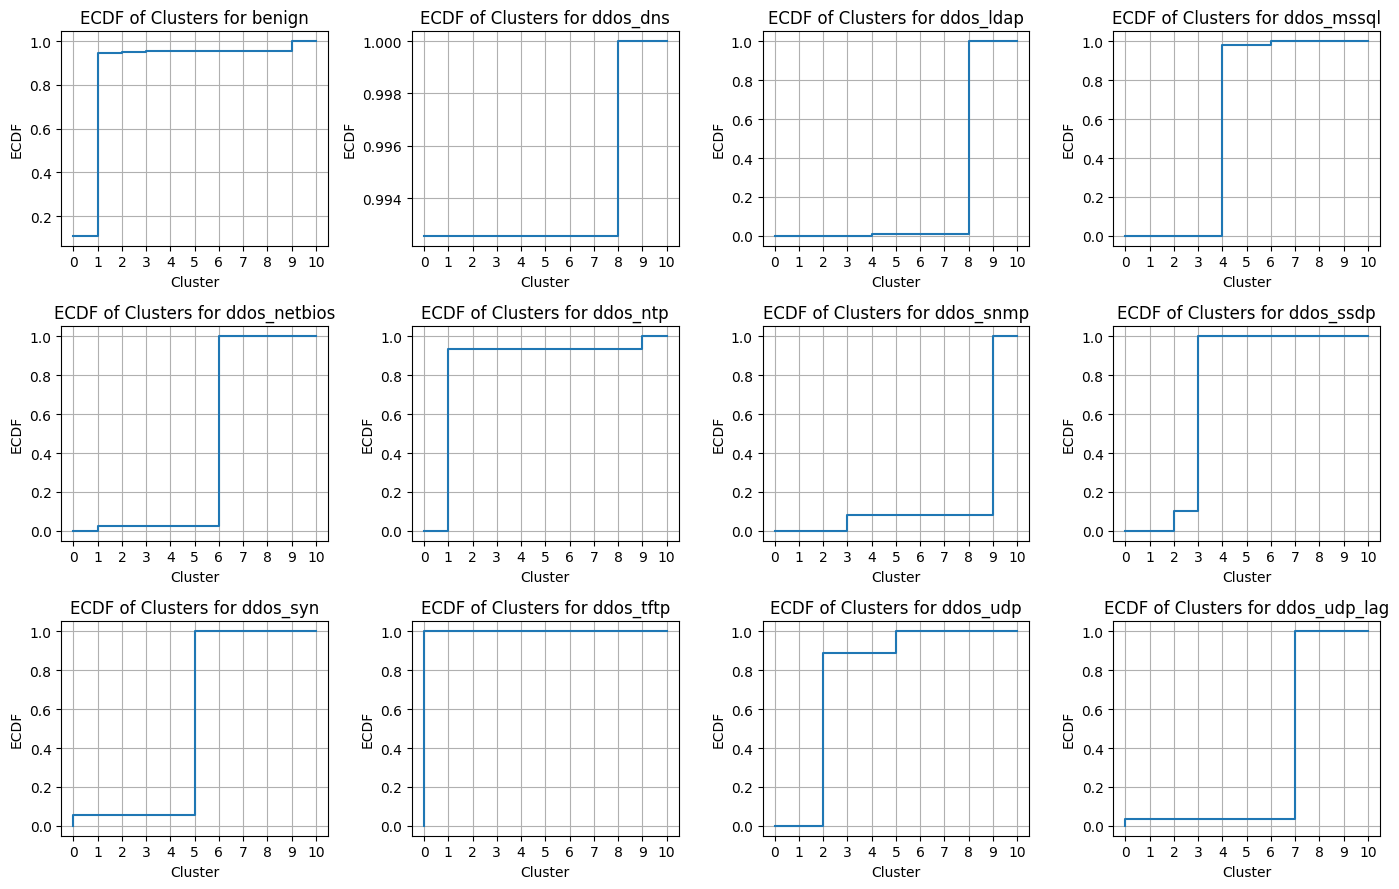

In [16]:
num_labels = len(cross_tab.index)
num_columns = 4 # Number of columns for the subplot grid
num_rows = (num_labels // num_columns) + (num_labels % num_columns)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(14, num_rows * 3))
axes = axes.flatten()  # Flatten the axes to iterate over them

# Loop through each label and plot the ECDF
for i, label in enumerate(cross_tab.index):
    cluster_counts = cross_tab.loc[label].values
    cluster_numbers = np.arange(len(cluster_counts))  # Cluster numbers
    
    # Sort the counts and calculate the ECDF
    sorted_indices = np.argsort(cluster_numbers)  # Keep cluster order
    sorted_counts = cluster_counts[sorted_indices]
    
    ecdf_values = np.cumsum(sorted_counts) / np.sum(sorted_counts)  # Normalize the ECDF
    
    ax = axes[i]  # Select the appropriate subplot
    ax.step(cluster_numbers, ecdf_values)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('ECDF')
    ax.set_title(f'ECDF of Clusters for {label}')
    ax.set_xticks(np.arange(len(cluster_counts)))  # Set x-axis ticks
    ax.set_xticklabels(cross_tab.columns)
    ax.grid(True)

# Hide any extra subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## GMM


### Determinate number of clusters

In [15]:
gmm = GaussianMixture(n_components=11)
cl_labels_gmm = gmm.fit_predict(X) # Get clusters ID

# Unsupervised metric
silhouette_gmm  = silhouette_score(X, cl_labels_gmm)
log_l=gmm.score(X)
# Supervised metrics
ri_gmm = rand_score(np.ravel(y), cl_labels_gmm)
ari_gmm = adjusted_rand_score(np.ravel(y), cl_labels_gmm)


# report effective size
print("Effetive size of each cluster: ", gmm.weights_)
# report usupervised and supervised metric
print(f'GMM total log-likelihood score:, {round(log_l, 2)}')
print(f'Silhouette: {round(silhouette_gmm, 2)}')
print(f'RI: {round(ri_gmm, 2)}')
print(f'ARI: {round(ari_gmm, 2)}')

Effetive size of each cluster:  [0.12360571 0.03747083 0.09257779 0.09318327 0.06661114 0.03290836
 0.09247668 0.16715669 0.12956166 0.07302366 0.09142421]
GMM total log-likelihood score:, 136.27
Silhouette: 0.31
RI: 0.95
ARI: 0.74


best k:  11  with corresponding silhouette:  0.3051046579359221


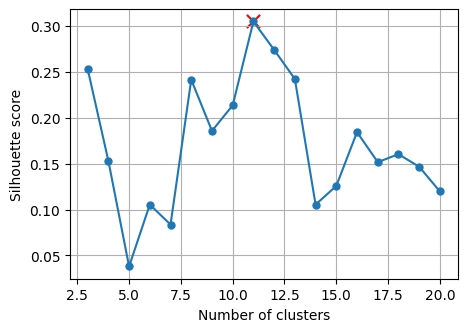

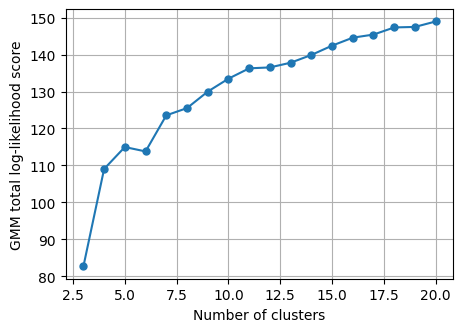

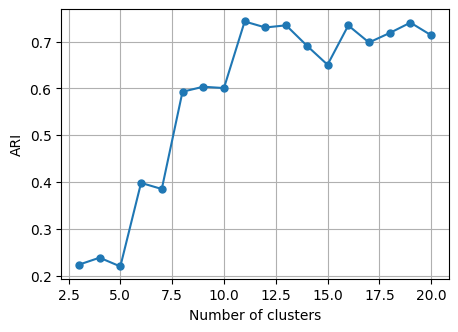

In [16]:
n_cluster_list_gmm=[]
shs_list_gmm = []
ri_list_gmm = []
ari_list_gmm = []
log_l_list_gmm=[]
for n_clusters in range(3, 21):
    gmm = GaussianMixture(n_components=n_clusters)
    cl_labels = gmm.fit_predict(X)
    silhouette  = silhouette_score(X, cl_labels)
    n_cluster_list_gmm.append(n_clusters)
    shs_list_gmm.append(silhouette)
    ri_list_gmm.append(rand_score(np.ravel(y), cl_labels))
    ari_list_gmm.append(adjusted_rand_score(np.ravel(y), cl_labels))
    log_l_list_gmm.append(gmm.score(X))
    


# Get n_clusters leading to the highest silhouette
best_sh_gmm= np.max(shs_list_gmm)
best_n_gmm =n_cluster_list_gmm[np.argmax(shs_list_gmm)]
print("best k: ",best_n_gmm, " with corresponding silhouette: ", best_sh_gmm)

# Plot
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list_gmm,shs_list_gmm, marker='o', markersize=5)
plt.scatter(best_n_gmm, best_sh_gmm, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


# Plot GMM total log-likelihood score
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list_gmm,log_l_list_gmm, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('GMM total log-likelihood score')
plt.show()

# Plot ARI
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list_gmm,ari_list_gmm, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('ARI')
plt.show()

In [17]:
#2D PCA
pca = PCA(n_components=2)
projection = pca.fit_transform(X)
projection = pd.DataFrame(projection)

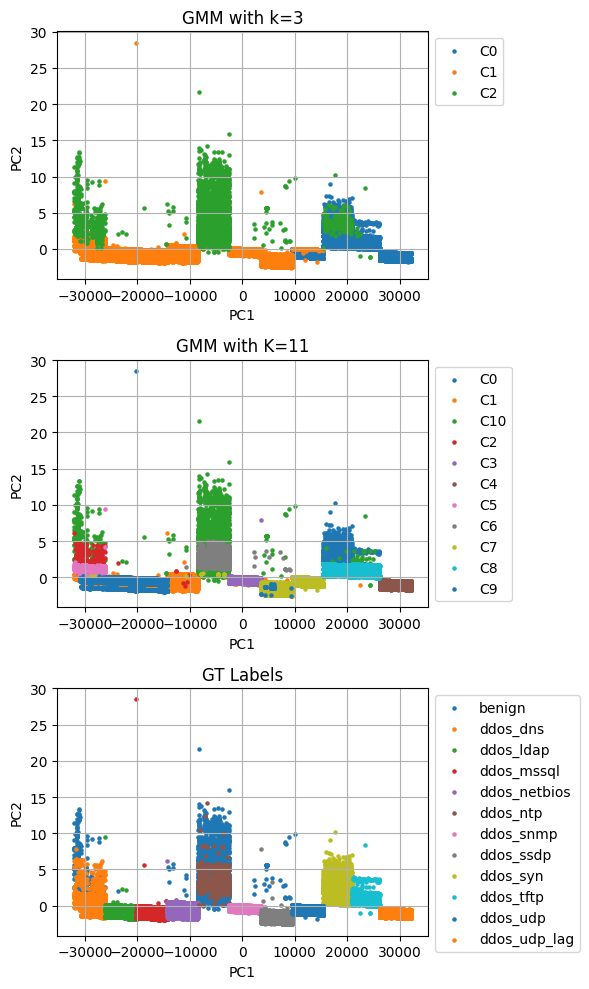

In [18]:

gmm3 = GaussianMixture(n_components=3)
cl_labels3_gmm = gmm3.fit_predict(X)   
    
projection['cid3'] = [f'C{x}' for x in cl_labels3_gmm]
projection['cidBest'] = [f'C{x}' for x in cl_labels_gmm]
projection['label'] = y.reshape(-1)

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

for i in np.unique(projection.cid3):
    subdf = projection[projection.cid3==i]
    axs[0].scatter(subdf[0], subdf[1], label=i, s=5)
axs[0].grid()
lgnd = axs[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_title('GMM with k=3')
    
for i in np.unique(projection.cidBest):
    subdf = projection[projection.cidBest==i]
    axs[1].scatter(subdf[0], subdf[1], label=i, s=5)
axs[1].grid()
lgnd = axs[1].legend(bbox_to_anchor=(1, 1), loc="upper left")

axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_title(f'GMM with K={best_n_gmm}')

for i in np.unique(y):
    subdf = projection[projection.label==i]
    axs[2].scatter(subdf[0], subdf[1], label=i, s=5)
axs[2].grid()
lgnd = axs[2].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[2].set_xlabel('PC1')
axs[2].set_ylabel('PC2')
axs[2].set_title('GT Labels')


plt.tight_layout()
plt.show()

### Analysis of clusters

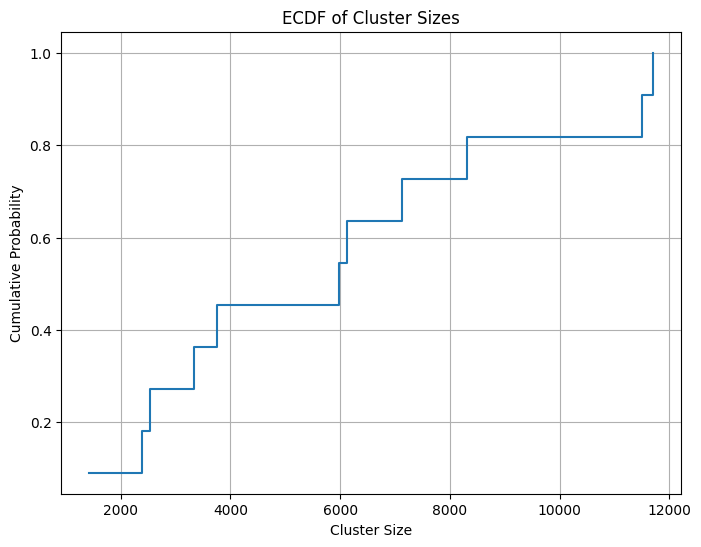

In [19]:
unique_labels_gmm, counts_gmm = np.unique(cl_labels_gmm, return_counts=True)

# ECDF
cluster_sizes_gmm = pd.Series(counts_gmm)  # Counts the members for each cluster
size_counts_gmm = cluster_sizes_gmm.value_counts().sort_index()  # Occurrences of each cluster size
ecdf_gmm = size_counts_gmm.cumsum() / size_counts_gmm.sum()  # Calculate the ECDF

# ECDF Plot
plt.figure(figsize=(8, 6))
plt.step(size_counts_gmm.index, ecdf_gmm, where='post')
plt.title('ECDF of Cluster Sizes')  # Title
plt.xlabel('Cluster Size')         # X-axis label
plt.ylabel('Cumulative Probability')  # Y-axis label
plt.grid()
plt.show()


In [20]:
# Cross-tabulation between original labels and detected clusters
cross_tab_gmm = pd.crosstab(df['label'], cl_labels_gmm, rownames=['Original Labels'], colnames=['Cluster'])
print("Contingency Table:")

display(cross_tab_gmm)

Contingency Table:


Cluster,0,1,2,3,4,5,6,7,8,9,10
Original Labels,,,,,,,,,,,
benign,0,2,443,0,0,0,3190,14,0,0,2009
ddos_dns,0,660,975,0,0,3330,0,3,0,324,77
ddos_ldap,0,238,3,0,0,3,0,0,0,5682,2
ddos_mssql,0,285,3,0,0,0,0,10,0,5610,3
ddos_netbios,0,5823,6,0,0,0,0,1,0,0,0
ddos_ntp,0,6,0,0,0,0,574,0,0,0,406
ddos_snmp,0,29,0,5947,0,0,0,0,0,0,8
ddos_ssdp,0,89,3,184,0,0,0,5603,0,87,4
ddos_syn,2333,0,0,0,0,0,0,0,3143,0,4


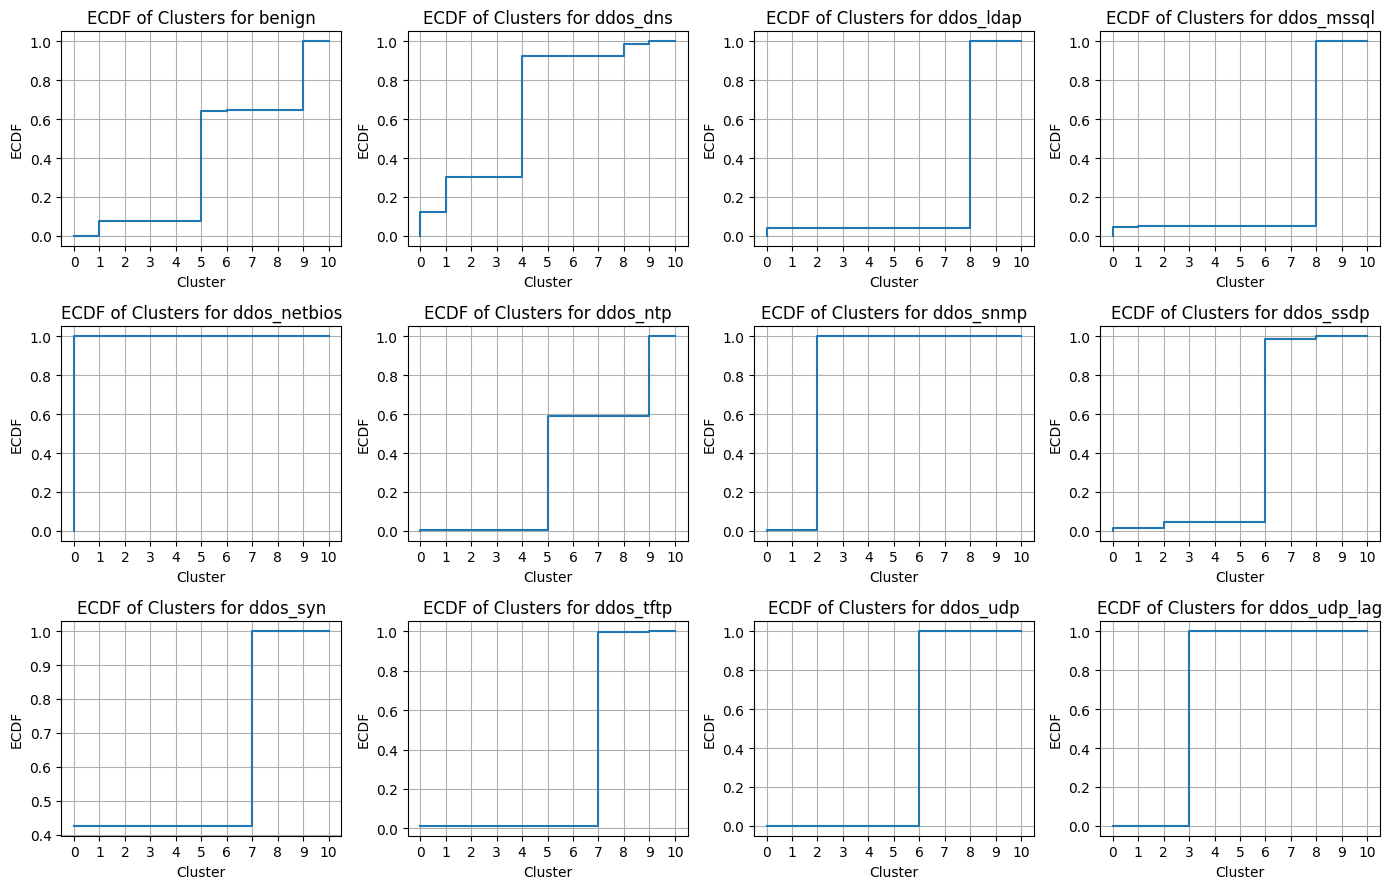

In [21]:
num_labels = len(cross_tab_gmm.index)
num_columns = 4 # Number of columns for the subplot grid
num_rows = (num_labels // num_columns) + (num_labels % num_columns)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(14, num_rows * 3))
axes = axes.flatten()  # Flatten the axes to iterate over them

# Loop through each label and plot the ECDF
for i, label in enumerate(cross_tab_gmm.index):
    cluster_counts = cross_tab_gmm.loc[label].values
    cluster_numbers = np.arange(len(cluster_counts))  # Cluster numbers
    
    # Sort the counts and calculate the ECDF
    sorted_indices = np.argsort(cluster_numbers)  # Keep cluster order
    sorted_counts = cluster_counts[sorted_indices]
    
    ecdf_values = np.cumsum(sorted_counts) / np.sum(sorted_counts)  # Normalize the ECDF
    
    ax = axes[i]  # Select the appropriate subplot
    ax.step(cluster_numbers, ecdf_values)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('ECDF')
    ax.set_title(f'ECDF of Clusters for {label}')
    ax.set_xticks(np.arange(len(cluster_counts)))  # Set x-axis ticks
    ax.set_xticklabels(cross_tab_gmm.columns)
    ax.grid(True)

# Hide any extra subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Section 4

## Feature Importance Analysis

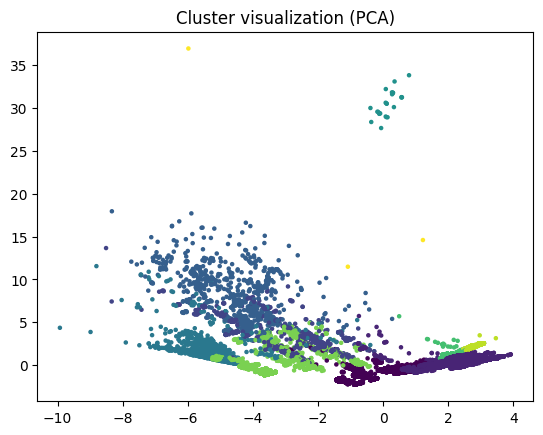


--- Feature Importances (Silhouette Score) ---
Baseline Silhouette Score: 0.4109
Feature 0: Mean Shuffled Score = 0.3613, Baseline = 0.4109
Feature 1: Mean Shuffled Score = 0.3612, Baseline = 0.4109
Feature 2: Mean Shuffled Score = 0.4087, Baseline = 0.4109
Feature 3: Mean Shuffled Score = 0.3520, Baseline = 0.4109
Feature 4: Mean Shuffled Score = 0.3972, Baseline = 0.4109
Feature 5: Mean Shuffled Score = 0.4038, Baseline = 0.4109
Feature 6: Mean Shuffled Score = 0.4000, Baseline = 0.4109
Feature 7: Mean Shuffled Score = 0.3677, Baseline = 0.4109
Feature 8: Mean Shuffled Score = 0.4106, Baseline = 0.4109
Feature 9: Mean Shuffled Score = 0.4028, Baseline = 0.4109
Feature 10: Mean Shuffled Score = 0.4077, Baseline = 0.4109
Feature 11: Mean Shuffled Score = 0.3564, Baseline = 0.4109
Feature 12: Mean Shuffled Score = 0.3793, Baseline = 0.4109
Feature 13: Mean Shuffled Score = 0.4099, Baseline = 0.4109
Feature 14: Mean Shuffled Score = 0.3762, Baseline = 0.4109
Feature 15: Mean Shuffled Sc

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Function to calculate feature importance using the silhouette score
def clustering_permutation_importance_debug(model, X, n_repeats=10):
    baseline_score = silhouette_score(X, model.labels_)
    importances = np.zeros(X.shape[1])
    print(f"Baseline Silhouette Score: {baseline_score:.4f}")
    
    for col in range(X.shape[1]):
        scores = []
        X_shuffled = X.copy()
        for _ in range(n_repeats):
            np.random.shuffle(X_shuffled[:, col])
            shuffled_score = silhouette_score(X_shuffled, model.labels_)
            scores.append(shuffled_score)
        
        print(f"Feature {col}: Mean Shuffled Score = {np.mean(scores):.4f}, Baseline = {baseline_score:.4f}")
        importances[col] = baseline_score - np.mean(scores)
    
    return importances

# Function to calculate feature importance using intracluster variance
def clustering_permutation_importance_variance(model, X, n_repeats=10):
    baseline_score = -model.inertia_  # Negative inertia (minimizing cost)
    importances = np.zeros(X.shape[1])
    print(f"Baseline Inertia: {baseline_score:.4f}")

    for col in range(X.shape[1]):
        scores = []
        X_shuffled = X.copy()
        for _ in range(n_repeats):
            np.random.shuffle(X_shuffled[:, col])
            model_shuffled = KMeans(n_clusters=model.n_clusters, 
                                     init=model.init, 
                                     n_init=model.n_init, 
                                     random_state=model.random_state).fit(X_shuffled)
            scores.append(-model_shuffled.inertia_)
        
        importances[col] = baseline_score - np.mean(scores)
        print(f"Feature {col}: Mean Shuffled Inertia = {np.mean(scores):.4f}, Baseline = {baseline_score:.4f}")

    return importances



# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering
optimal_cluster = 11
kmeans = KMeans(n_clusters=optimal_cluster, n_init=50, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Visualize the clusters (using PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=5)
plt.title("Cluster visualization (PCA)")
plt.show()

# Calculate feature importance (Silhouette Score)
print("\n--- Feature Importances (Silhouette Score) ---")
feature_importances_silhouette = clustering_permutation_importance_debug(kmeans, X_scaled, n_repeats=10)

# Calculate feature importance (Intracluster Variance)
print("\n--- Feature Importances (Inertia) ---")
feature_importances_variance = clustering_permutation_importance_variance(kmeans, X_scaled, n_repeats=10)

# Show results sorted by importance
feature_names = df_copy.columns  
print("\n--- Sorted Feature Importances (Silhouette Score) ---")
for i in np.argsort(feature_importances_silhouette)[::-1]:
    print(f"{feature_names[i]:<30}: {feature_importances_silhouette[i]:.4f}")

print("\n--- Sorted Feature Importances (Inertia) ---")
for i in np.argsort(feature_importances_variance)[::-1]:
    print(f"{feature_names[i]:<30}: {feature_importances_variance[i]:.4f}")


## Attack Pattern Investigation

In [33]:
#Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering with Gaussian Mixture Model
best_n_gmm = 11
gmm = GaussianMixture(n_components=best_n_gmm, random_state=42)
cl_labels_gmm = gmm.fit_predict(X_scaled)

# Creation of the DataFrame with clusters and GT labels
columns = df_copy.columns
X_df = pd.DataFrame(X_scaled, columns=columns)
X_df['Cluster'] = cl_labels_gmm
X_df['GT_label'] = np.ravel(y)

# Function to calculate feature importance using Silhouette Score
def clustering_permutation_importance(model, X, labels, n_repeats=10):
    baseline_score = silhouette_score(X, labels)
    importances = np.zeros(X.shape[1])
    
    for col in range(X.shape[1]):
        scores = []
        X_shuffled = X.copy()
        for _ in range(n_repeats):
            np.random.shuffle(X_shuffled[:, col])
            shuffled_score = silhouette_score(X_shuffled, labels)
            scores.append(shuffled_score)
        
        importances[col] = baseline_score - np.mean(scores)
    
    return importances

# Filter the data for the DNS attack and the clusters of interest
dns_attack_subset = X_df[(X_df['GT_label'] == 'ddos_dns') & (X_df['Cluster'].isin([1, 2, 5, 9]))]

# Calculation of silhouette scores for important features
X_dns = dns_attack_subset.drop(columns=['Cluster', 'GT_label']).to_numpy()
labels_dns = dns_attack_subset['Cluster'].values
feature_importances_dns = clustering_permutation_importance(gmm, X_dns, labels_dns, n_repeats=10)

# Sorting the features by importance
sorted_indices_dns = np.argsort(feature_importances_dns)[::-1]

print("--- Feature Importances for DNS Attack (Silhouette Score) ---")
for i in sorted_indices_dns:
    print(f"{columns[i]:<30}: {feature_importances_dns[i]:.4f}")




--- Feature Importances for DNS Attack (Silhouette Score) ---
Source_Port_Below_1024        : 0.1915
Source_Port_1024_and_Above    : 0.1904
Init_Win_bytes_forward        : 0.1240
Fwd Packet Length Std         : 0.0672
ACK Flag Count                : 0.0669
Protocol_6                    : 0.0646
Protocol_17                   : 0.0639
Down/Up Ratio                 : 0.0274
Fwd Packet Length Max         : 0.0261
Max Packet Length             : 0.0246
Bwd Packet Length Max         : 0.0235
Fwd Packets/s                 : 0.0215
Init_Win_bytes_backward       : 0.0163
Flow Bytes/s                  : 0.0103
Bwd IAT Min                   : 0.0091
Bwd IAT Total                 : 0.0072
CWE Flag Count                : 0.0048
act_data_pkt_fwd              : 0.0016
Bwd Packets/s                 : 0.0016
Idle Mean                     : 0.0009
Unnamed: 0.1                  : 0.0009
Unnamed: 0                    : 0.0008
Fwd Header Length.1           : 0.0003
Total Fwd Packets             : 0.0001
Bw

--- Feature Importances for ddos_ldap and ddos_mssql (Silhouette Score) ---
Flow Bytes/s                  : 0.1238
Fwd Packets/s                 : 0.0627
Fwd Packet Length Max         : 0.0384
Idle Mean                     : 0.0158
Max Packet Length             : 0.0138
min_seg_size_forward          : 0.0037
Unnamed: 0                    : 0.0034
Unnamed: 0.1                  : 0.0033
Fwd Header Length.1           : 0.0005
Source_Port_1024_and_Above    : 0.0002
Source_Port_Below_1024        : 0.0001
act_data_pkt_fwd              : 0.0001
Total Fwd Packets             : 0.0000
Flow IAT Min                  : 0.0000
Init_Win_bytes_forward        : -0.0000
Bwd IAT Total                 : -0.0000
Protocol_17                   : -0.0000
Protocol_6                    : -0.0000
Fwd Packet Length Std         : -0.0000
Bwd Packet Length Max         : -0.0000
Bwd Packet Length Min         : -0.0000
Protocol_0                    : -0.0000
Bwd IAT Min                   : -0.0000
Init_Win_bytes_bac

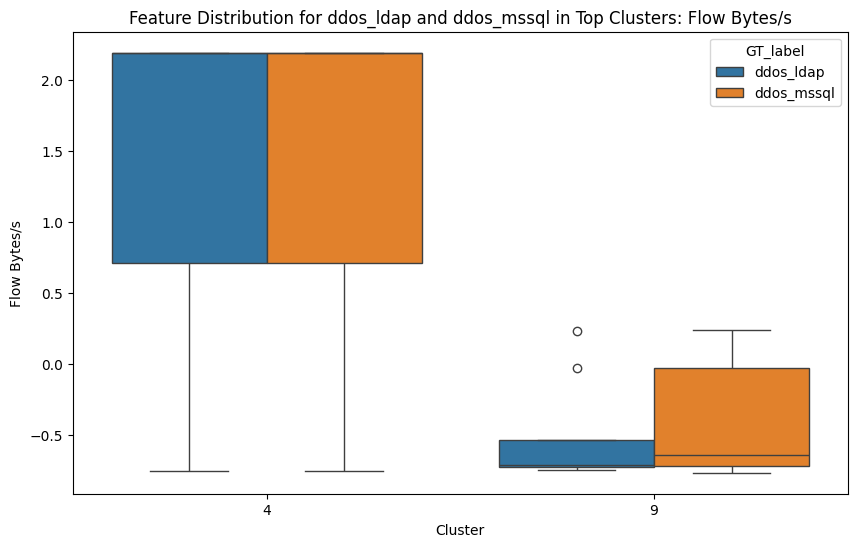

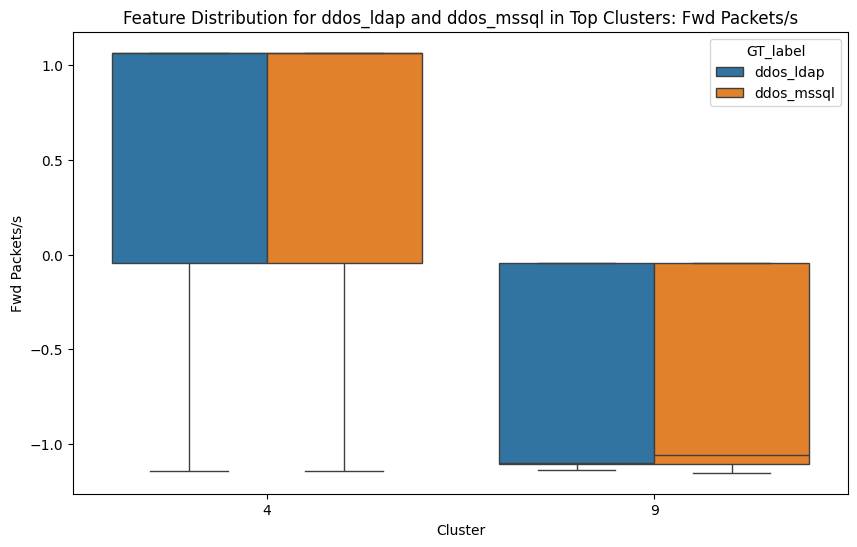

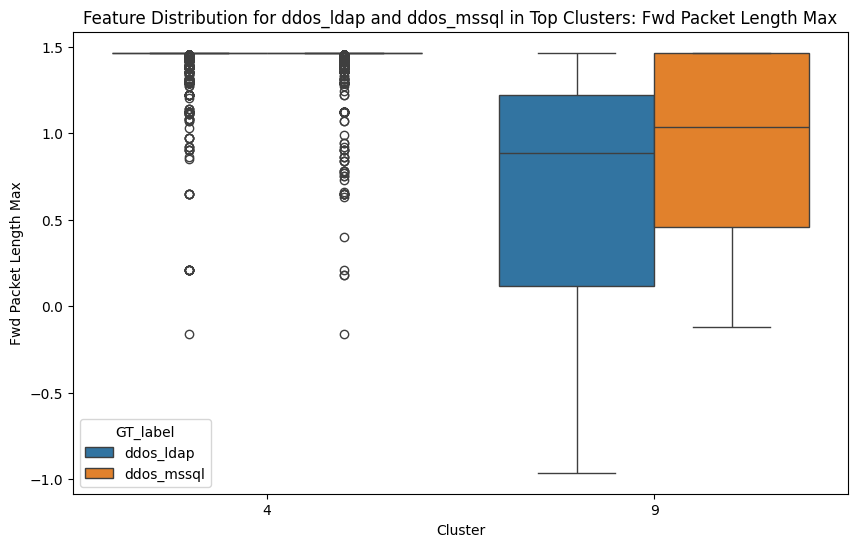

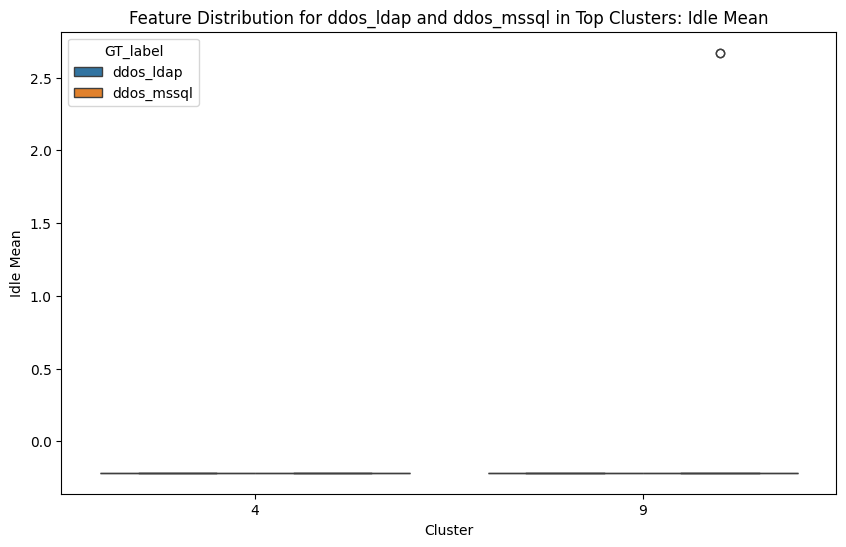

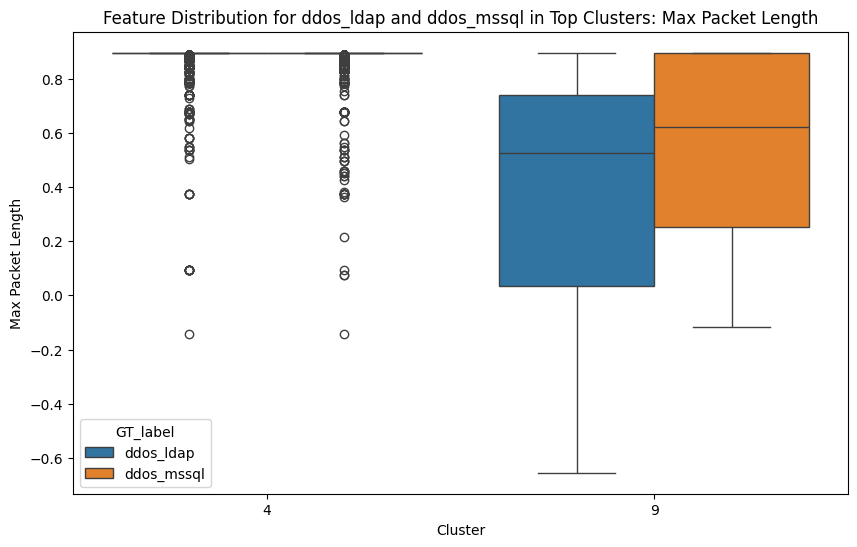

In [36]:
#Filter the data for ddos_ldap and ddos_mssql attacks
ldap_mssql_subset = X_df[X_df['GT_label'].isin(['ddos_ldap', 'ddos_mssql'])]

#Count the most representative clusters for the two attacks
cluster_counts = ldap_mssql_subset.groupby(['Cluster', 'GT_label']).size().reset_index(name='Counts')
top_clusters = cluster_counts.groupby('Cluster')['Counts'].sum().nlargest(2).index.tolist()

#Filter the data for the most representative clusters
filtered_subset = ldap_mssql_subset[ldap_mssql_subset['Cluster'].isin(top_clusters)]

#Verify that there are at least two distinct clusters
unique_clusters = filtered_subset['Cluster'].unique()

if len(unique_clusters) > 1:
    #Prepare the data to calculate the silhouette score
    X_ldap_mssql = filtered_subset.drop(columns=['Cluster', 'GT_label']).to_numpy()
    labels_ldap_mssql = filtered_subset['Cluster'].values

    # Calculate the most important features
    feature_importances_ldap_mssql = clustering_permutation_importance(gmm, X_ldap_mssql, labels_ldap_mssql, n_repeats=10)

    # Sort the features by importance
    sorted_indices_ldap_mssql = np.argsort(feature_importances_ldap_mssql)[::-1]

    print("--- Feature Importances for ddos_ldap and ddos_mssql (Silhouette Score) ---")
    for i in sorted_indices_ldap_mssql:
        print(f"{columns[i]:<30}: {feature_importances_ldap_mssql[i]:.4f}")

   # Display the main features
    top_features_ldap_mssql = [columns[idx] for idx in sorted_indices_ldap_mssql[:5]]
    for feature in top_features_ldap_mssql:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=filtered_subset, x='Cluster', y=feature, hue='GT_label')
        plt.title(f"Feature Distribution for ddos_ldap and ddos_mssql in Top Clusters: {feature}")
        plt.xlabel("Cluster")
        plt.ylabel(feature)
        plt.legend(title="GT_label")
        plt.show()
else:
    print("There are not enough distinct clusters to calculate the silhouette score.")
